In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("Data_Clusters.csv",dtype={'fullVisitorID': str}).drop(columns = ["Unnamed: 0"])

In [3]:
data = pd.get_dummies(data.drop(columns = ['fullVisitorID','date','transactionRevenue','transactions','target']))

In [4]:
data.drop(columns = ['city_not available in demo dataset'],inplace = True)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(data)

Text(0.5, 1.0, 'sq distances with clusters values')

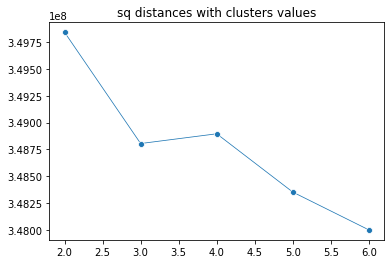

In [6]:
from sklearn.cluster import KMeans
sq_distances = []
k_values = list(range(2,7))


for k in k_values:
    kmeans = KMeans(n_clusters=k,n_init = 25,random_state=0)
    kmeans.fit(X)
    sq_distances.append(kmeans.inertia_)   
sns.lineplot(x = k_values,y = sq_distances, marker = "o",legend = False,size = 30 ).set_title('sq distances with clusters values')

Text(0.5, 1.0, 'silhouette score with each cluster')

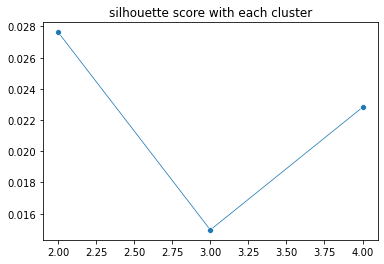

In [7]:
from sklearn.metrics import silhouette_score

silhouette = []
k_values = list(range(2,5))


for k in k_values:
    kmeans = KMeans(n_clusters=k,n_init = 25,random_state=0)
    kmeans.fit(X)
    score = silhouette_score(X,kmeans.labels_)
    silhouette.append(score)   
sns.lineplot(x = k_values,y = silhouette, marker = "o",legend = False,size = 30 ).set_title("silhouette score with each cluster")

Text(0.5, 1.0, 'calinski harabasz score with each cluster')

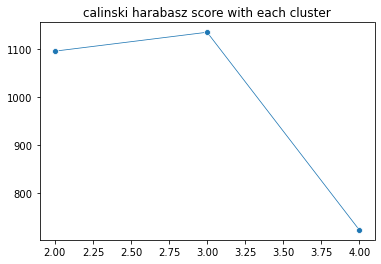

In [8]:
from sklearn.metrics import calinski_harabasz_score

calinski_harabaz = []
k_values = list(range(2,5))


for k in k_values:
    kmeans = KMeans(n_clusters=k,n_init = 25,random_state=0)
    kmeans.fit(X)
    score = calinski_harabasz_score(X,kmeans.labels_)
    calinski_harabaz.append(score)   
sns.lineplot(x = k_values,y = calinski_harabaz, marker = "o",legend = False,size = 30 ).set_title ("calinski harabasz score with each cluster") 

In [11]:
from sklearn.cluster import KMeans
kmeans_final = KMeans(n_clusters=3,n_init = 200,random_state=0)

In [12]:
kmeans_final.fit(X)

KMeans(n_clusters=3, n_init=200, random_state=0)

In [18]:
import pickle
with open('model_kmeans.pkl', 'wb') as f_model_kmeans:
    pickle.dump(kmeans_final,  f_model_kmeans)

In [19]:
with open('model_scaler.pkl', 'wb') as f_scaler:
    pickle.dump(scaler,  f_scaler)

In [15]:
data = pd.read_csv("Data_Clusters.csv",dtype={'fullVisitorID': str}).drop(columns = ["Unnamed: 0"])

In [16]:
data["cluster"] = kmeans_final.labels_

In [20]:
data.head()

,fullVisitorID,visitNumber,date,bounces,hits,pageviews,timeOnSite,transactionRevenue,transactions,source,channelGrouping,browser,deviceCategory,country,city,target,cluster
0,8533875475515924645,1,2017-02-05,1.0,1,1.0,0.0,0.0,0.0,(direct),Organic Search,Chrome,desktop,Australia,Sydney,0,1
1,4874599869430831185,2,2017-02-05,1.0,1,1.0,0.0,0.0,0.0,(direct),Organic Search,Chrome,mobile,Turkey,Istanbul,0,1
2,0361954421372951638,1,2017-02-05,1.0,1,1.0,0.0,0.0,0.0,(direct),Organic Search,Chrome,desktop,Russia,Moscow,0,1
3,8751850432978942600,2,2017-02-05,1.0,1,1.0,0.0,0.0,0.0,bing,Organic Search,Edge,desktop,United States,not available in demo dataset,0,1
4,2451058030378352110,1,2017-02-05,1.0,1,1.0,0.0,0.0,0.0,(direct),Organic Search,Chrome,desktop,Indonesia,not available in demo dataset,0,1


In [32]:
data.cluster.value_counts()

1    199712
0    140843
2     52301
Name: cluster, dtype: int64

In [33]:
data_cluster_1 = data[data.cluster == 0]

In [34]:
data_cluster_2 = data[data.cluster == 1]

In [35]:
data_cluster_3 = data[data.cluster == 2]

In [36]:
data_dates1 = pd.DataFrame()   #  revenew per month 
data_dates1["month"] = pd.DatetimeIndex(data_cluster_1['date']).month
data_dates1["revenue"] = data_cluster_1.transactionRevenue[data_cluster_1.transactionRevenue > 0]
print(data_dates1.groupby(['month'])['revenue'].mean())

month
1    301.200193
2    191.165968
3    127.325026
4    167.569461
5    161.142178
6    171.787828
Name: revenue, dtype: float64


In [37]:
data_dates2 = pd.DataFrame()    
data_dates2["month"] = pd.DatetimeIndex(data_cluster_2['date']).month
data_dates2["revenue"] = data_cluster_2.transactionRevenue[data_cluster_2.transactionRevenue > 0]
print(data_dates2.groupby(['month'])['revenue'].mean())

month
1    75.839327
2    94.528162
3    95.221406
4    96.323625
5    85.502925
6    76.663222
Name: revenue, dtype: float64


In [38]:
data_dates3 = pd.DataFrame()  
data_dates3["month"] = pd.DatetimeIndex(data_cluster_3['date']).month
data_dates3["revenue"] = data_cluster_3.transactionRevenue[data_cluster_3.transactionRevenue > 0]
print(data_dates3.groupby(['month'])['revenue'].mean())

month
1         NaN
2    40.39000
3    59.29125
4         NaN
5         NaN
6         NaN
Name: revenue, dtype: float64


In [45]:
data_paises1 = pd.DataFrame()  
data_paises1["pais"] = data_cluster_1.groupby("country").filter(lambda x: len(x) > 3000)["country"]                                   
data_paises1["revenue"] = data_cluster_1.transactionRevenue[data_cluster_1.transactionRevenue > 0]
print(data_paises1.groupby(['pais'])['revenue'].mean())

pais
Canada            192.419750
India              59.584000
Japan             443.543333
United Kingdom    144.580000
United States     186.197189
Name: revenue, dtype: float64


In [46]:
data_paises2 = pd.DataFrame()   
data_paises2["pais"] = data_cluster_2.groupby("country").filter(lambda x: len(x) > 3000)["country"]                                   
data_paises2["revenue"] = data_cluster_2.transactionRevenue[data_cluster_2.transactionRevenue > 0]
print(data_paises2.groupby(['pais'])['revenue'].mean())

pais
Australia         570.160000
Canada            178.336316
France                   NaN
Germany            37.976667
India                    NaN
Italy                    NaN
Japan             279.336000
Netherlands              NaN
Spain                    NaN
United Kingdom    152.020000
United States      86.632552
Name: revenue, dtype: float64


In [47]:
data_paises3 = pd.DataFrame()   
data_paises3["pais"] = data_cluster_3.groupby("country").filter(lambda x: len(x) > 3000)["country"]                                   
data_paises3["revenue"] = data_cluster_3.transactionRevenue[data_cluster_3.transactionRevenue > 0]
print(data_paises3.groupby(['pais'])['revenue'].mean())

pais
India                 NaN
United States    42.95375
Name: revenue, dtype: float64
